# Matplotlib - Visualisation with Python

In [1]:
#pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt #library for plotting

### Defining a Function to import Stock Data from Yahoo Finance 

In [3]:
def Stock_Data(Ticker, Sdate, Edate):
    tick = yf.Ticker(Ticker)
    hist_data =  tick.history(start = Sdate, end = Edate)
    hist_data['Volume'] = hist_data['Volume']/1e5
    hist_data['Returns'] = hist_data['Close'].pct_change()
    hist_data.reset_index(inplace = True)
    hist_data.rename(columns = {'index':'Date'}, inplace = True)
    hist_data['Date'] = hist_data['Date'].dt.strftime('%Y/%m/%d')
    hist_data['Date'] = pd.to_datetime(hist_data['Date']) 
    return hist_data

Downloading Microsoft Data

In [4]:
tick = 'MSFT'
SDate = '2022-11-01'
EDate = '2023-12-31'

Data = Stock_Data(tick, SDate, EDate)
Data = Data[Data['Returns'].notna()]

print(Data.head(5))

        Date        Open        High         Low       Close   Volume  \
1 2022-11-02  225.571309  227.380123  216.310938  216.369934  384.070   
2 2022-11-03  216.360105  216.674689  210.353651  210.619080  366.339   
3 2022-11-04  213.863142  217.834669  209.812955  217.638062  367.891   
4 2022-11-07  218.227870  224.539066  217.529896  224.008209  334.980   
5 2022-11-08  224.824170  227.724173  222.012638  224.991287  281.925   

   Dividends  Stock Splits   Returns  
1        0.0           0.0 -0.035368  
2        0.0           0.0 -0.026579  
3        0.0           0.0  0.033325  
4        0.0           0.0  0.029269  
5        0.0           0.0  0.004389  


Timeseries Plot of Price

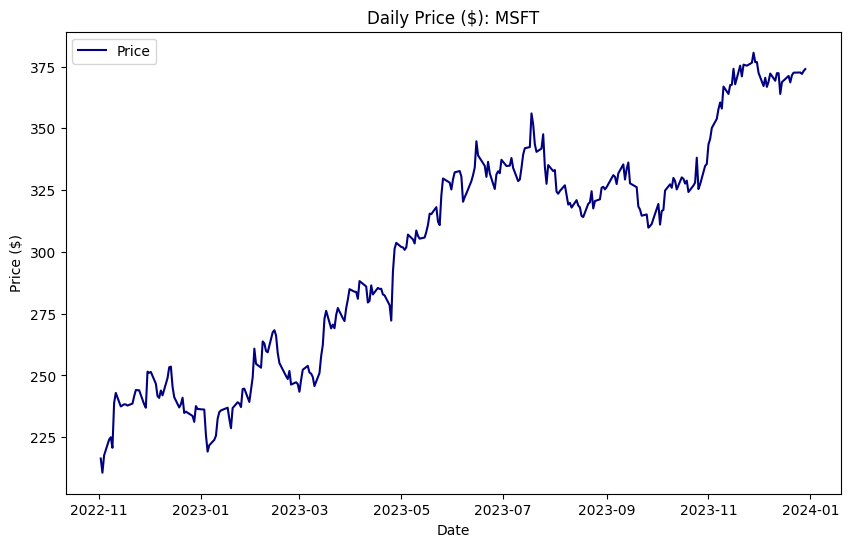

In [5]:
plt.figure(figsize = (10, 6)) #define figure dimensions
plt.plot(Data['Date'], Data['Close'], label  = 'Price', color = 'navy')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Price ($)', fontsize  = 10)
plt.title(f'Daily Price ($): {tick}')
plt.legend(loc = 2)
plt.savefig('Price.png') #Code for saving the figure. 
#For more information on Matplotlib Color choices: https://matplotlib.org/stable/gallery/color/named_colors.html


Bar Plot of Volume 

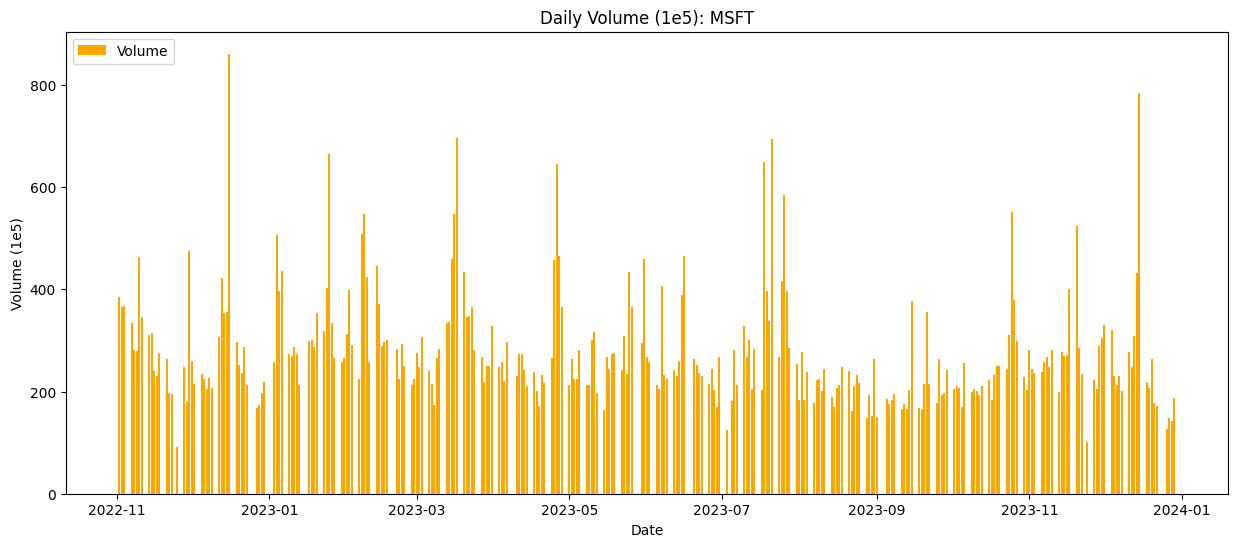

In [ ]:
plt.figure(figsize = (15, 6)) #define figure dimensions
plt.bar(Data['Date'], Data['Volume'], label  = 'Volume', color = 'orange')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Volume (1e5)', fontsize  = 10)
plt.title(f'Daily Volume (1e5): {tick}')
plt.legend(loc = 2)
plt.savefig('Volume_Bar.png') #Plot saved in Directory

Overlay Plot: Price (lineplot) amd Volume (Bar)

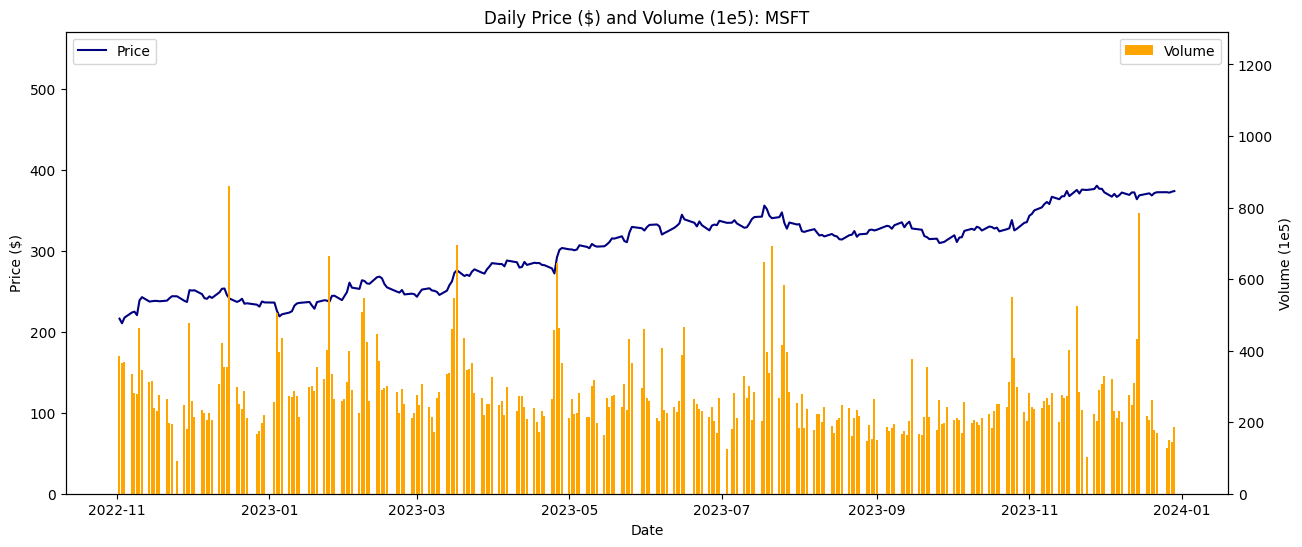

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6)) # default number of subplots = 1
ax.plot(Data['Date'], Data['Close'], label  = 'Price', color = 'navy')
ax2 = ax.twinx() #creating a another y-axis (right) on the same x-axis
ax2.bar(Data['Date'], Data['Volume'], label  = 'Volume', color = 'orange')
ax.set_ylim(0, Data['Close'].max()*1.5) #setting y-axis limits
ax2.set_ylim(0, Data['Volume'].max()*1.5) #setting y-axis (2) limits
ax.set_xlabel('Date', fontsize  = 10)
ax.set_ylabel('Price ($)', fontsize  = 10)
ax2.set_ylabel('Volume (1e5)')
ax.set_title(f'Daily Price ($) and Volume (1e5): {tick}')
ax.legend(loc = 2)
ax2.legend(loc = 1)
plt.savefig('Price_Volume_Overlay.png')

Subplot of Price and Volume

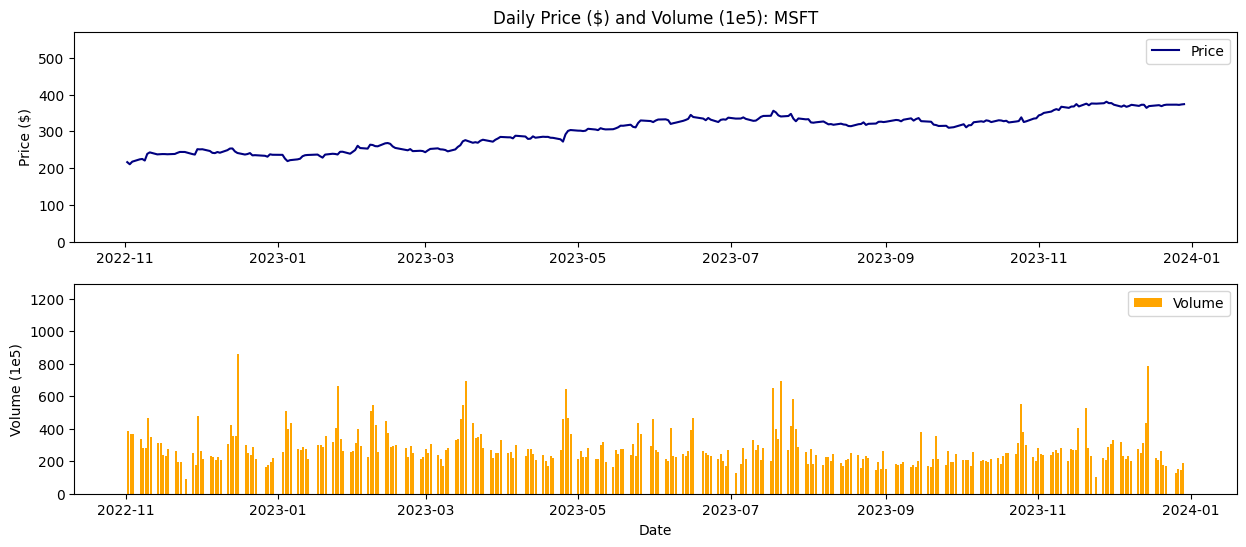

In [ ]:
fig, ax = plt.subplots(2, figsize = (15, 6)) #indicate that there are two subplots
ax[0].plot(Data['Date'], Data['Close'], label  = 'Price', color = 'navy')
ax[0].set_ylim(0, Data['Close'].max()*1.5) 
ax[0].set_ylabel('Price ($)', fontsize  = 10)
ax[0].legend(loc = 1)

ax[1].bar(Data['Date'], Data['Volume'], label  = 'Volume', color = 'orange')
ax[1].set_ylim(0, Data['Volume'].max()*1.5)
ax[1].set_xlabel('Date', fontsize  = 10)
ax[1].set_ylabel('Volume (1e5)')
ax[0].set_title(f'Daily Price ($) and Volume (1e5): {tick}')
ax[1].legend(loc = 1)
plt.savefig('Price_Volume_Subplots.png')

Scatter Plot for Returns

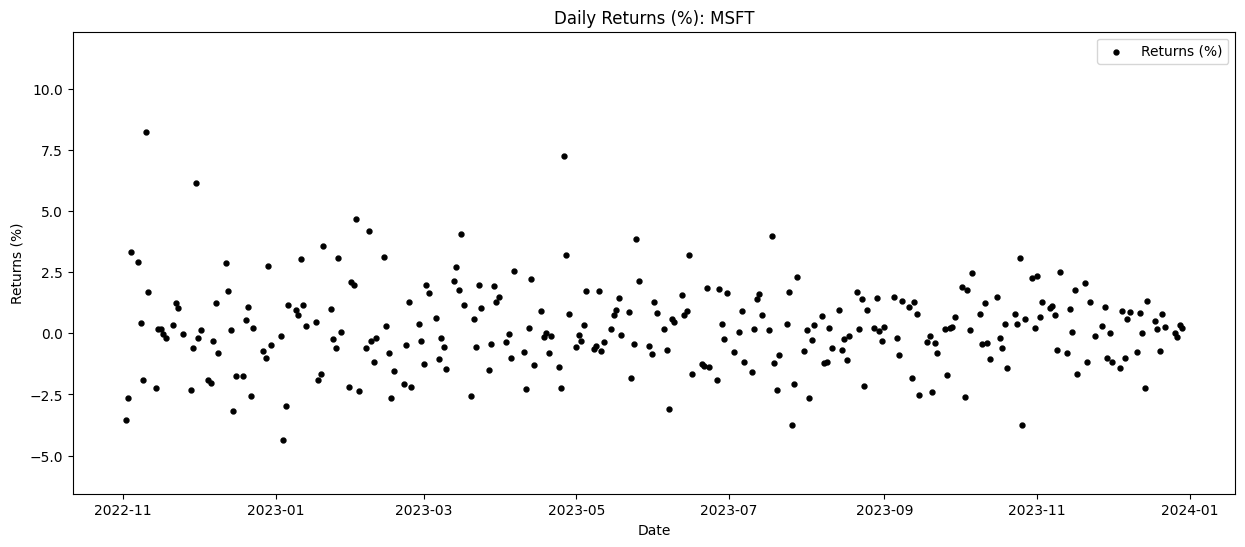

In [9]:
fig, ax = plt.subplots(figsize = (15,6))
ax.scatter(Data['Date'], Data['Returns']*100, marker = '.', color = 'black', s=50, label = 'Returns (%)') #s = size
ax.set_ylim(Data['Returns'].min()*100*1.5, Data['Returns'].max()*100*1.5) #setting y-axis limits
ax.set_ylabel('Returns (%)', fontsize  = 10)
ax.set_xlabel('Date', fontsize  = 10)
ax.set_title(f'Daily Returns (%): {tick}')
ax.legend(loc = 1)
plt.savefig('Returns_Scatter.png')

#For more information on Scatter Plot markers: https://matplotlib.org/stable/api/markers_api.html


Box-Plot of Returns

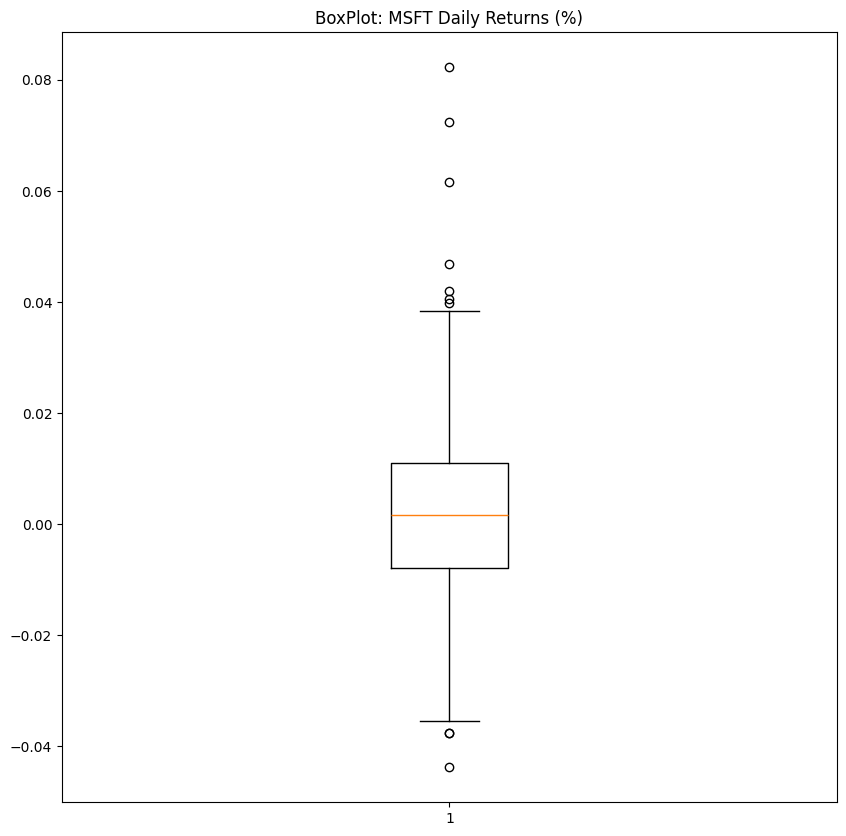

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(Data['Returns'])  #For boxplots, make sure nan values are dropped
ax.set_title(f'BoxPlot: {tick} Daily Returns (%)')
plt.savefig('Returns_BoxPlot.png')

Histogram and Cumulative Density Plots 

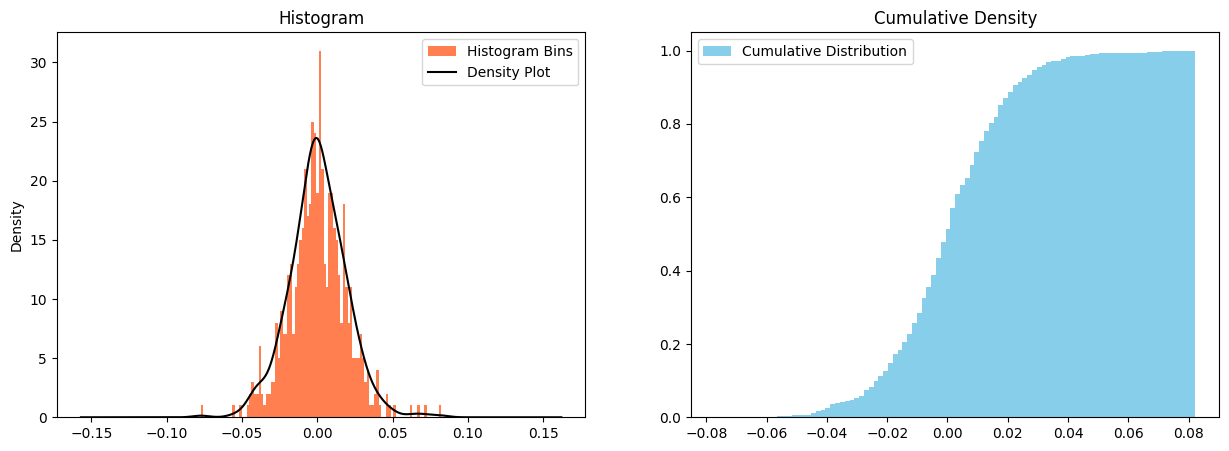

In [11]:
tick = 'MSFT'
SDate = '2021-11-01'
EDate = '2023-12-31'


Data = Stock_Data(tick, SDate, EDate)
Data = Data[Data['Returns'].notna()]


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.hist(Data['Returns'], bins = 100, color = 'coral', label = 'Histogram Bins')
Data['Returns'].plot.kde(ax = ax1, color = 'Black', label = 'Density Plot') #adds density plot
ax1.set_title('Histogram')
ax1.legend(loc = 1)
ax2.hist(Data['Returns'], bins = 100, color = 'skyblue', density = True, cumulative = True, label = 'Cumulative Distribution')
ax2.legend(loc = 2)
ax2.set_title('Cumulative Density')
plt.savefig('Returns_Hist_and_CumulativeDensity.png')

#Histrogram: Distribution of Returns
#Cumulative Density: Probability of Returns 

Groupby Plots: Plotting Monthly Volume 

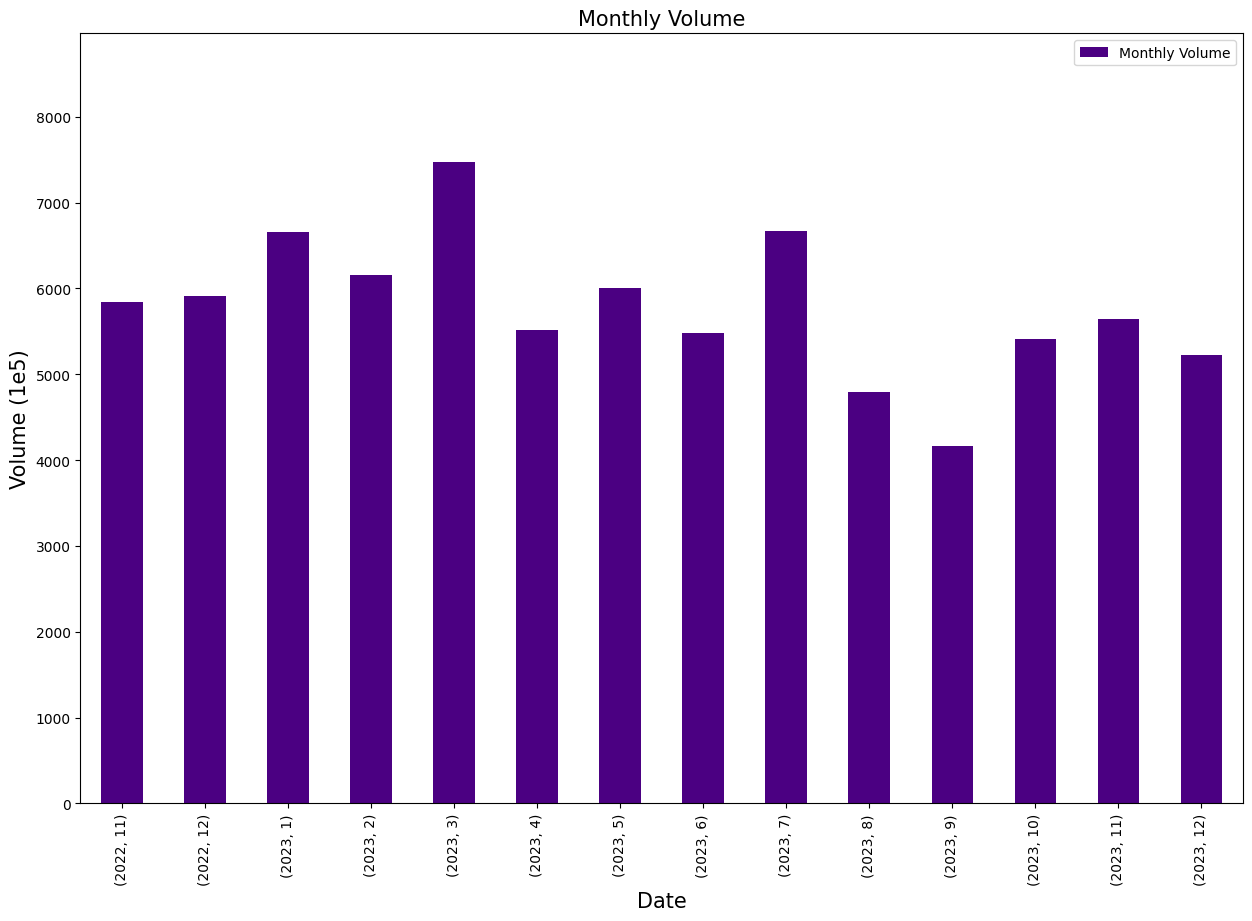

In [12]:
tick = 'MSFT'
SDate = '2022-11-01'
EDate = '2023-12-31'


Data = Stock_Data(tick, SDate, EDate)
Data = Data[Data['Returns'].notna()]

Vol_Grouped = Data.groupby(by = [Data['Date'].dt.year.rename('Year'), Data['Date'].dt.month.rename('Month')])['Volume'].sum()

fig, ax = plt.subplots(figsize = (15,10))
Vol_Grouped.plot(kind= 'bar', ax = ax, color = 'indigo', label =  'Monthly Volume')
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Volume (1e5)', fontsize = 15)
ax.set_title('Monthly Volume', fontsize = 15)
ax.set_ylim(0, Vol_Grouped.max()*1.2)
ax.legend(loc = 1)
plt.savefig('Monthly_Volume.png')


#For those interested in fixing the date on the x-axis. 

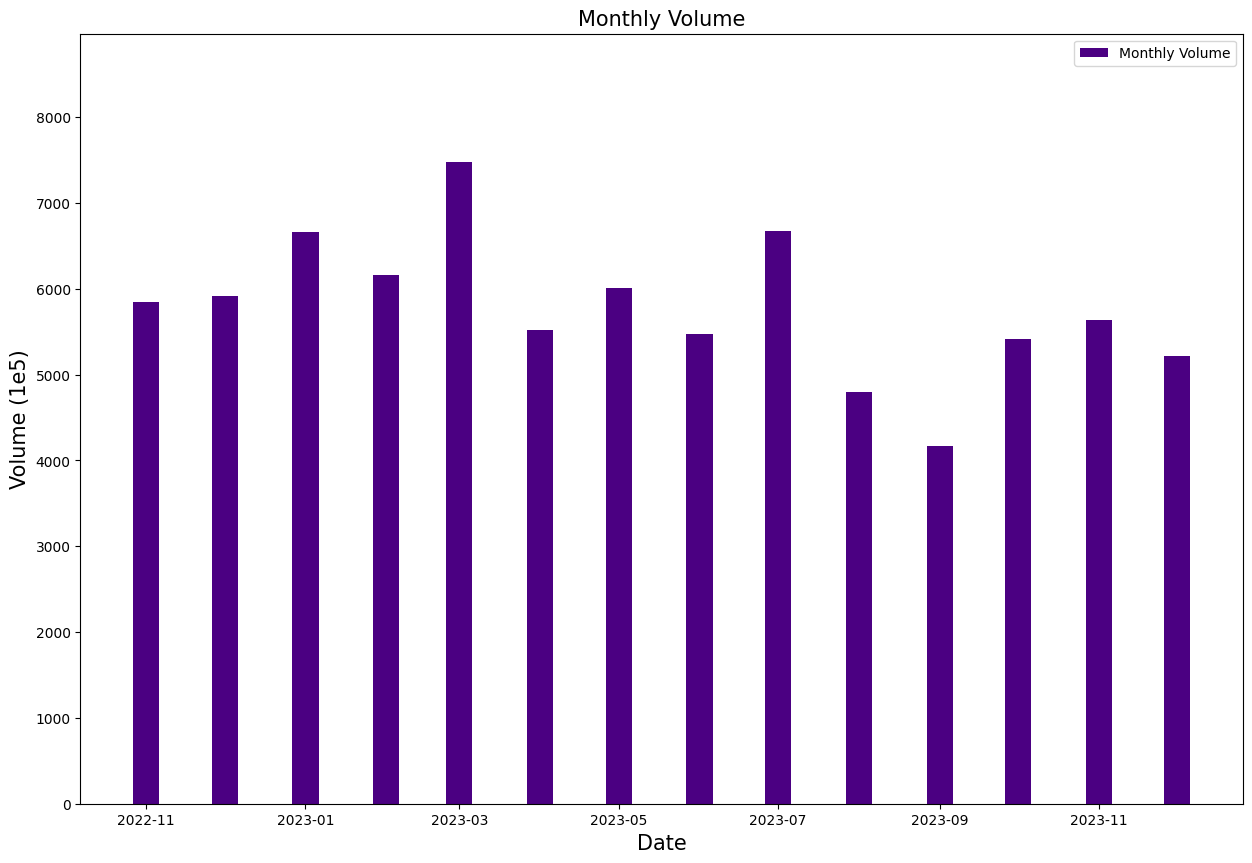

In [13]:
tick = 'MSFT'
SDate = '2022-11-01'
EDate = '2023-12-31'


Data = Stock_Data(tick, SDate, EDate)
Data = Data[Data['Returns'].notna()]
Vol_Grouped = pd.DataFrame(Vol_Grouped)
Vol_Grouped.reset_index(inplace = True)

from datetime import date
Date = []
for y, m in zip(Vol_Grouped.Year, Vol_Grouped.Month):
    Date.append(date(y, m, 1))  #put 1 hear to get the month
Vol_Grouped['Date'] = pd.to_datetime(Date)


fig, ax = plt.subplots(figsize = (15,10))
ax.bar(Vol_Grouped['Date'], Vol_Grouped['Volume'], width = 10, color = 'indigo', label =  'Monthly Volume')
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Volume (1e5)', fontsize = 15)
ax.set_title('Monthly Volume', fontsize = 15)
ax.set_ylim(0, Vol_Grouped['Volume'].max()*1.2)
ax.legend(loc = 1)
plt.savefig('Monthly_Volume_Neater_Date.png')


Surf Plot: Quadratic Equation

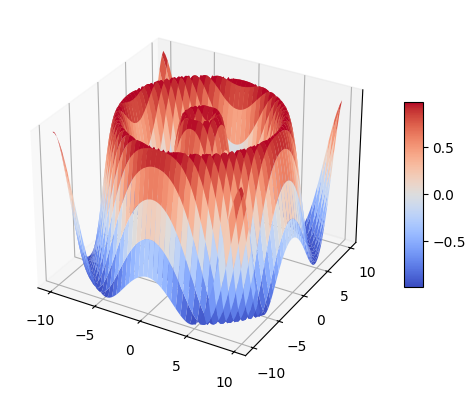

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

#X and Y range between -10 and 10, at increments of 0.25
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
#create a meshgrid (80 x 80 grids of X and Y values):
    #X and Y have 80 unique values: 
        #For X: In the mesh grid, each column is attributed to a unique value.
        #column 1 = len = 80, each of the 80 rows are assigned -10. 
        #For Y: In the mesh grid, each row is attributed to a unique value.
        #row1 = len = 80, each of the 80 columns are assigned -10. 
X, Y = np.meshgrid(X, Y) 

R = np.sqrt(X**2 + Y**2) #Quadratic Function: 80 x 80 grid based.
    #Each grid value is obtained from the X and Y values at the same location, in their respective grids.
Z = np.sin(R) 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) #creates the surface plot grid
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)
#cmap = color maps, more information at: https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax.zaxis.set_major_locator(LinearLocator(0)) #allows to control number of values diplayed on z-axis
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('Surface_Place.png')


Contour Plots: Quadratic Equation

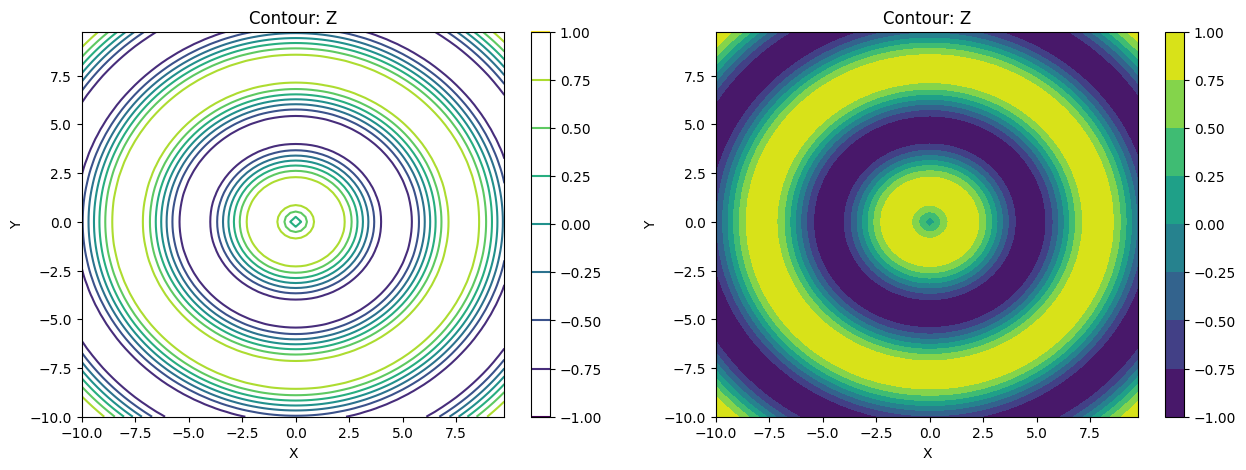

In [15]:
import numpy as np
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y) 
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) 
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

con1 = ax1.contour(X, Y, Z)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Contour: Z')
plt.colorbar(con1, ax = ax1)

con2 = ax2.contourf(X,Y,Z)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Contour: Z')
plt.colorbar(con2,ax = ax2)

plt.savefig('Contour_Plots.png')